In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data



In [3]:
start = '2010-01-01'
end ='2019-12-31'


In [13]:
df = pd.read_csv('C:\\Users\\Vansh\\Downloads\\SBIN.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-01,18.261845,18.662842,18.030684,18.398657,13.454566,11237186.0
1,2001-01-02,18.643970,19.719585,18.412809,19.417658,14.199740,21367159.0
2,2001-01-03,19.436529,20.799915,19.351612,20.502707,14.993221,59167521.0
3,2001-01-04,20.606495,20.851810,19.743174,20.063971,14.672376,29457229.0
4,2001-01-05,20.068687,20.606495,19.875265,20.280979,14.831070,29628333.0


In [14]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5465,2022-11-21,602.099976,602.099976,595.349976,598.099976,598.099976,7412419.0
5466,2022-11-22,598.150024,600.700012,596.150024,599.099976,599.099976,8048595.0
5467,2022-11-23,601.549988,609.599976,601.000000,607.650024,607.650024,12435924.0
5468,2022-11-24,609.750000,611.299988,605.799988,609.349976,609.349976,8960032.0
5469,2022-11-25,610.549988,613.700012,606.250000,607.400024,607.400024,9994513.0


In [15]:
df = df.drop(['Date','Adj Close'], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,18.261845,18.662842,18.030684,18.398657,11237186.0
1,18.643970,19.719585,18.412809,19.417658,21367159.0
2,19.436529,20.799915,19.351612,20.502707,59167521.0
3,20.606495,20.851810,19.743174,20.063971,29457229.0
4,20.068687,20.606495,19.875265,20.280979,29628333.0


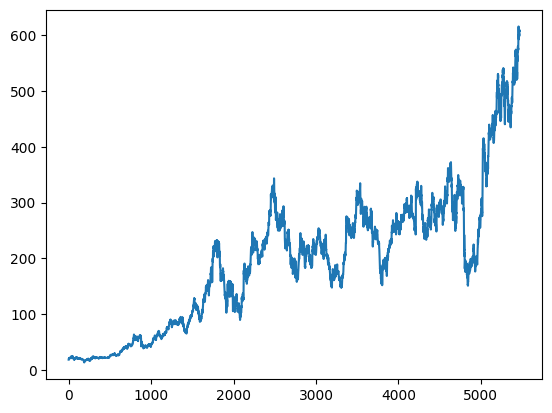

In [17]:
plt.plot(df.Close)

In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5465    536.5695
5466    537.9485
5467    539.3825
5468    540.8850
5469    542.3000
Name: Close, Length: 5470, dtype: float64

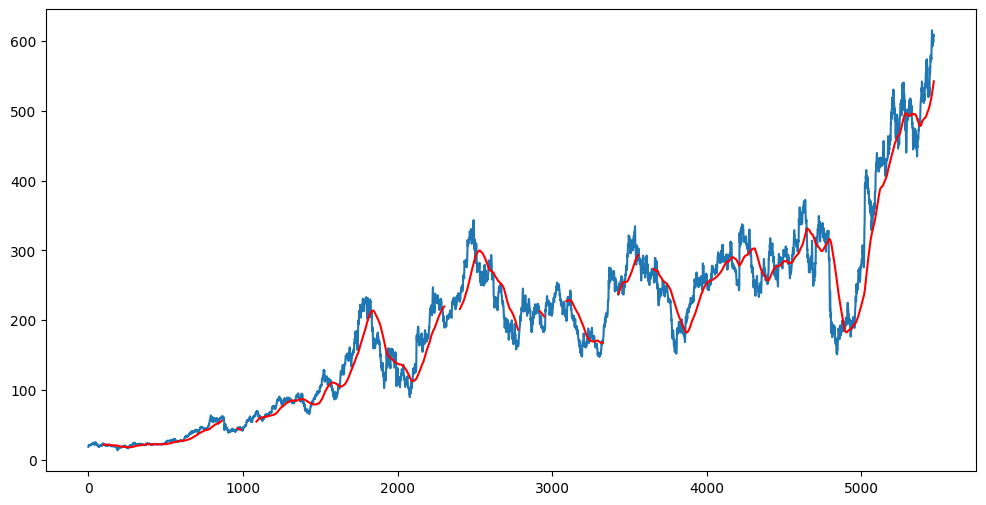

In [18]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100 ,'r')


In [19]:
ma200 =df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5465    511.41725
5466    511.72125
5467    512.09800
5468    512.44575
5469    512.78225
Name: Close, Length: 5470, dtype: float64

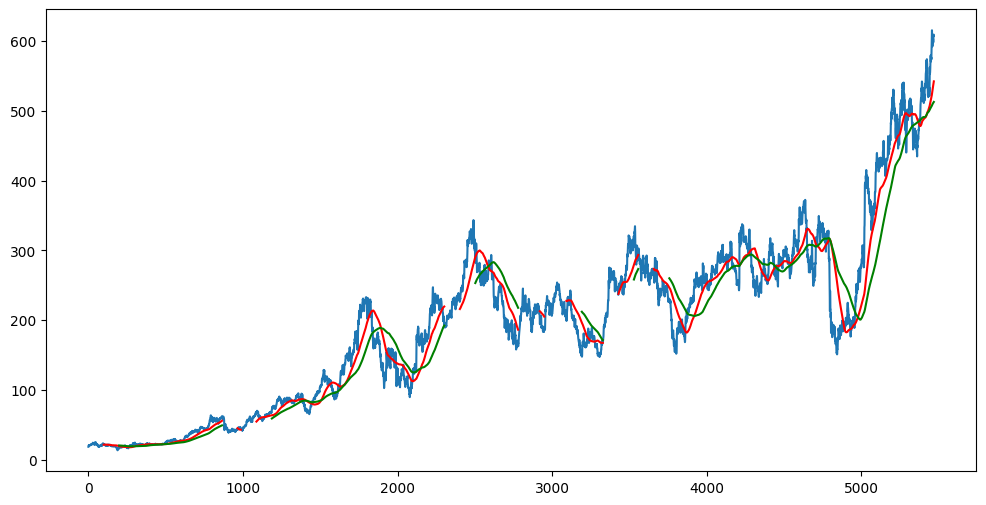

In [20]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100 ,'r')
plt.plot(ma200,'g')

In [21]:
df.shape

(5470, 5)

In [22]:
#splitng data in t o training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int (len(df))])
print(data_training.shape)
print(data_testing.shape)

(3828, 1)
(1642, 1)


In [23]:
data_training.head()

,Close
0,18.398657
1,19.417658
2,20.502707
3,20.063971
4,20.280979


In [24]:
data_testing.head()

,Close
3828,184.350006
3829,183.850006
3830,181.949997
3831,183.100006
3832,188.250000


In [25]:
from sklearn.preprocessing import MinMaxScaler      #### for LSTM model we have to scale down the data between 0 and 1 , clsing prices ka data 0 na d1 k beech
scaler = MinMaxScaler(feature_range=(0,1)) 

In [26]:
data_training_array = scaler.fit_transform(data_training)       ### fitting the training data to scaler
data_training_array

array([[0.01531082],
       [0.01839872],
       [0.02168675],
       ...,
       [0.54819546],
       [0.55243788],
       [0.54955909]])

In [27]:
data_training_array.shape

(3828, 1)

In [28]:
x_train = []
y_train = []  #defin etwo  empty list

for i in range(100, data_training_array.shape[0]) :
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i , 0])

#x_train             #####  use to see x_train  

###  now we have to convert x_train and y_train to numpy arrays to provide these data to LSTM model
x_train , y_train = np.array(x_train) , np.array(y_train)

In [29]:
from keras.layers import Dense , Dropout , LSTM            #########    ML MODEL
from keras.models import Sequential


In [30]:
from pandas.core.arrays.datetimes import sequence_to_datetimes
model = Sequential()
model.add(LSTM(units =50 ,activation ='relu' ,return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60 ,activation ='relu' ,return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units =80 ,activation ='relu' ,return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units =120 ,activation ='relu' ))
model.add(Dropout(0.5))


model.add(Dense(units =1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
model.compile(optimizer ='adam' ,loss = 'mean_squared_error')
model.fit(x_train ,y_train , epochs =50)

Epoch 1/50
117/117 [==============================] - 36s 260ms/step - loss: nan
Epoch 2/50
117/117 [==============================] - 32s 276ms/step - loss: nan
Epoch 3/50
117/117 [==============================] - 32s 271ms/step - loss: nan
Epoch 4/50
117/117 [==============================] - 31s 267ms/step - loss: nan
Epoch 5/50
117/117 [==============================] - 32s 271ms/step - loss: nan
Epoch 6/50
117/117 [==============================] - 34s 292ms/step - loss: nan
Epoch 7/50
117/117 [==============================] - 31s 264ms/step - loss: nan
Epoch 8/50
117/117 [==============================] - 30s 258ms/step - loss: nan
Epoch 9/50
117/117 [==============================] - 31s 265ms/step - loss: nan
Epoch 10/50
117/117 [==============================] - 34s 287ms/step - loss: nan
Epoch 11/50
117/117 [==============================] - 34s 290ms/step - loss: nan
Epoch 12/50
117/117 [==============================] - 30s 258ms/step - loss: nan
Epoch 13/50
117/117 [====

In [33]:
model.save('kereas_model.h5')

In [34]:
#for pridicting the value :: (30%)testing data

data_testing.head()

,Close
3828,184.350006
3829,183.850006
3830,181.949997
3831,183.100006
3832,188.250000


In [35]:
data_training.tail(100)

,Close
3728,233.899994
3729,243.000000
3730,246.100006
3731,241.199997
3732,240.250000
...,...
3823,189.500000
3824,197.550003
3825,194.250000
3826,195.649994


In [36]:
past_100_days = data_training.tail(100)

In [37]:
#df =dataframe , here we connecting the datatraining and data testing ::
final_df = past_100_days.append(data_testing , ignore_index=True)

C:\Users\Vansh\AppData\Local\Temp\ipykernel_39116\3446048285.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing , ignore_index=True)


In [38]:
final_df.head()

,Close
0,233.899994
1,243.000000
2,246.100006
3,241.199997
4,240.250000


In [39]:
input_data =scaler.fit_transform(final_df)
input_data

array([[0.17871743],
       [0.19829997],
       [0.20497096],
       ...,
       [0.98299986],
       [0.98665803],
       [0.98246188]])

In [40]:
input_data.shape

(1742, 1)

In [41]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100 : i])
  y_test.append(input_data[i , 0])

In [42]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1642, 100, 1)
(1642,)


In [43]:
#making predictions
y_predicted = model.predict(x_test)

52/52 [==============================] - 5s 72ms/step


In [44]:
y_predicted.shape

(1642, 1)

In [45]:
y_test

array([0.07208952, 0.07101356, 0.06692488, ..., 0.98299986, 0.98665803,
       0.98246188])

In [46]:
y_predicted

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [47]:
scaler.scale_

array([0.00215193])

In [48]:
scale_factor = 1/0.02044989
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

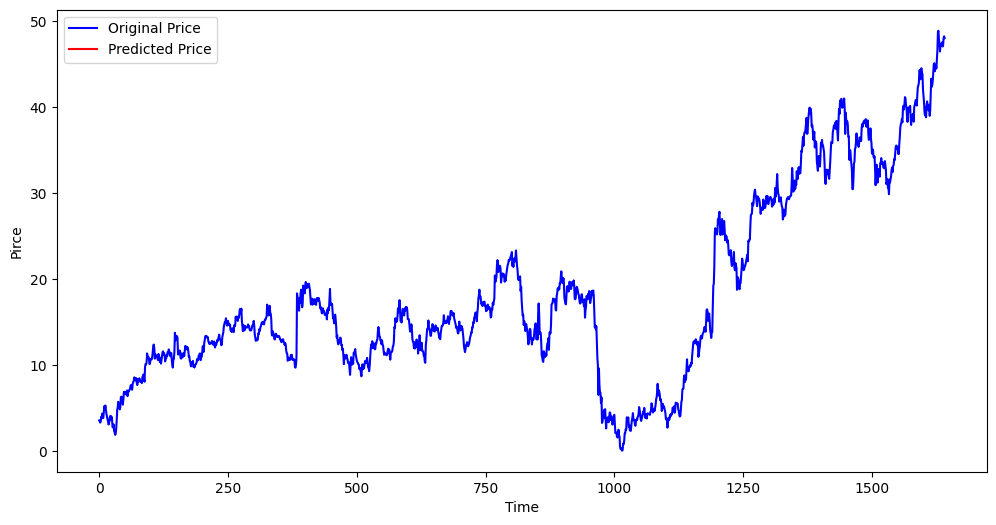

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label='Original Price')
plt.plot(y_predicted , 'r' , label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Pirce')
plt.legend()
plt.show()